In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
filenames = glob.glob("../data/gtrends*")

In [4]:
dfs = []
for name in filenames:
    df = pd.read_csv(
        name,
        skiprows=2,
    )
#     df.info()
    term = name.split("/")[-1].split("_")[1] + "-" + df.columns[1].split(":")[0].lower().replace(" ","_")
    df.columns = ["date", term]
    df.index = pd.to_datetime(df.date)
    del df["date"]
    df[term] = df[term].replace("<1",.5).astype(float)
#     df.head(2)
    dfs.append(df)
dfs = pd.concat(dfs,axis=1)
dfs.info()
dfs.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-12-01 to 2021-06-06
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   spanish-vacuna                      80 non-null     float64
 1   spanish-distanciamiento_social      80 non-null     float64
 2   russian-социальное_дистанцирование  80 non-null     float64
 3   portuguese-vacina                   80 non-null     float64
 4   portuguese-cloroquina               80 non-null     float64
 5   italian-vaccino                     80 non-null     float64
 6   italian-distanziamento_sociale      80 non-null     float64
 7   italian-clorochina                  80 non-null     float64
 8   german-impfstoff                    80 non-null     float64
 9   german-chloroquin                   80 non-null     float64
 10  french-vaccin                       80 non-null     float64
 11  french-distanciation_social

,spanish-vacuna,spanish-distanciamiento_social,russian-социальное_дистанцирование,portuguese-vacina,portuguese-cloroquina,italian-vaccino,italian-distanziamento_sociale,italian-clorochina,german-impfstoff,german-chloroquin,french-vaccin,french-distanciation_sociale,english-vaccine,english-chloroquine,portuguese-distanciamento_social,english-social_distancing,german-soziale_distanzierung
date,,,,,,,,,,,,,,,,,
2019-12-01,3.0,0.0,0.0,4.0,0.5,2.0,0.0,1.0,1.0,1.0,6.0,0.0,3.0,0.5,0.0,0.0,0.0
2019-12-08,3.0,0.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,0.5,6.0,0.0,3.0,0.5,0.0,0.5,0.0


In [33]:
colormap = {
    "portuguese": "#7fc97f",
    "spanish": "#beaed4",
    "german": "#fdc086",
    "english": "#bf5b17",
    "french": "#386cb0",
    "italian": "#f0027f"
}

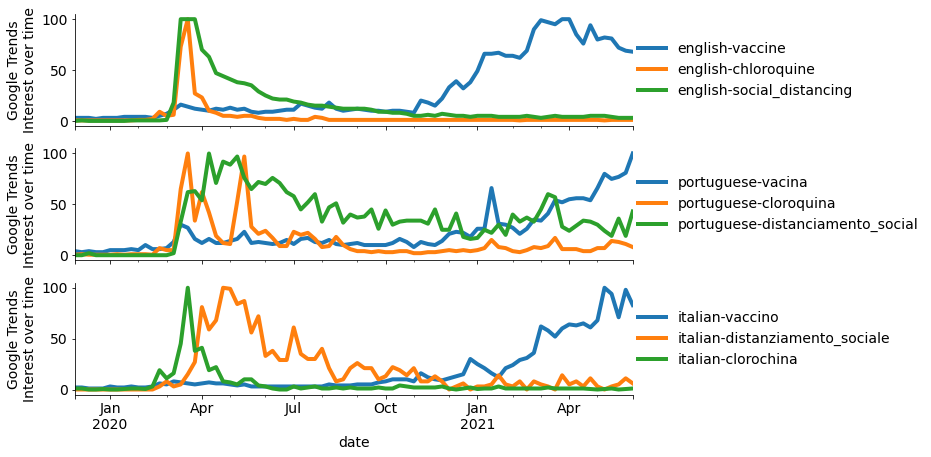

In [5]:
fig, axs = plt.subplots(3,1,figsize=(10,7),sharex=True)

# english terms
dfs[[c for c in dfs.columns if "english" in c]].plot(logy=False,ax=axs[0],lw=4)

# portuguese terms
dfs[[c for c in dfs.columns if "portuguese" in c]].plot(logy=False,ax=axs[1],lw=4)

# italian terms
dfs[[c for c in dfs.columns if "italian" in c]].plot(logy=False,ax=axs[2],lw=4)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax2 = ax.twinx()
    # ddays_summary.bot_score.plot(ax=ax2,color="r")
    ax.set_ylabel("Google Trends\nInterest over time")
    # ax2.set_ylabel("Msg bot score")
    ax.legend(
        loc=[1,.2],
        frameon=False
    )

In [49]:
for l in leg.get_texts():
    l.set_text(l.get_text().replace("_"," ").replace("-",": "))

spanish: vacuna
portuguese: vacina
italian: vaccino
french: vaccin
english: vaccine


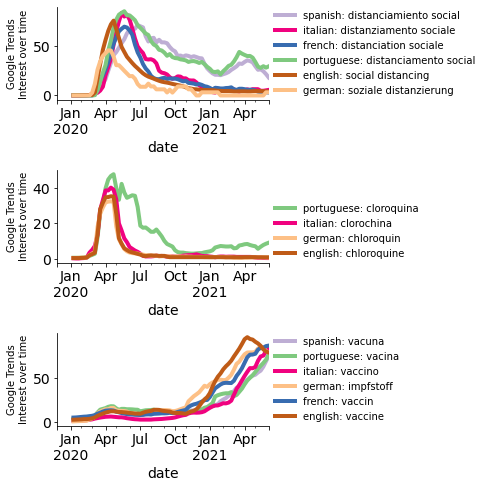

In [71]:
fig, axs = plt.subplots(3,1,figsize=(7,7))

# social distancing terms
for column, color in [(c, colormap.get(c.split("-")[0])) for c in dfs.columns if "so" in c]:
    dfs[column].rolling(7).mean().plot(logy=False,ax=axs[0],lw=4,c=color)
# dfs[list(cols)].plot(logy=False,ax=axs[0],lw=4,c=list(colors))

# cloroquina terms
for column, color in [(c, colormap.get(c.split("-")[0])) for c in dfs.columns if ("clo" in c) or ("chlo" in c)]:
    dfs[column].rolling(7).mean().plot(logy=False,ax=axs[1],lw=4,c=color)
# dfs[[c for c in dfs.columns if ("clo" in c) or ("chlo" in c)]].plot(logy=False,ax=axs[1],lw=4)

# vaccine terms
for column, color in [(c, colormap.get(c.split("-")[0])) for c in dfs.columns if ("vac" in c) or ("imp" in c)]:
    dfs[column].rolling(7).mean().plot(logy=False,ax=axs[2],lw=4,c=color)
# dfs[[c for c in dfs.columns if ("vac" in c) or ("imp" in c)]].plot(logy=False,ax=axs[2],lw=4)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax2 = ax.twinx()
    # ddays_summary.bot_score.plot(ax=ax2,color="r")
    ax.set_ylabel("Google Trends\nInterest over time",fontsize=10)
    # ax2.set_ylabel("Msg bot score")
    leg = ax.legend(
        loc=[1.01,.0],
        frameon=False,
        fontsize=10
    )
    for l in leg.get_texts():
        l.set_text(l.get_text().replace("_"," ").replace("-",": "))
plt.tight_layout()        
plt.savefig("gtrends.png", dpi=350,facecolor="white")

# States of Brazil

In [120]:
brazil_colormap = {
    'AP': "#edf8fb",
#     'AM': "#ccece6",
    'AM': "red",
    'AC': "#99d8c9",
    'PA': "#66c2a4",
    'RR': "#41ae76",
    'RO': "#238b45",
    'TO': "#005824", 
    
    'SC': "#df65b0", 
#     'RS': "#e7298a",
    'RS': "orange",
    'PR': "#ce1256",
    
    'MT': "#9ecae1",
    'GO': "#6baed6",
    'DF': "#4292c6",
    'MS': "#2171b5",
    
    'MG': "#9e9ac8",
    'SP': "#807dba",
    'RJ': "#6a51a3",
    'ES': "#4a1486",
    
    'PI': "#fff5eb",
    'PE': "#fee6ce",
    'PB': "#fdd0a2",
    'BA': "#fdae6b",
    'MA': "#fd8d3c",
    'RN': "#f16913",
    'SE': "#d94801", 
    'CE': "#a63603",
    'AL': "#7f2704"
}

In [83]:
dfs = []
for name in glob.glob("../data/brazil_states/gtrend*"):
    df = pd.read_csv(
        name,
        skiprows=2,
    )
#     df.info()
    term = name.split("/")[-1][7:9]
    df.columns = ["date", term]
    df.index = pd.to_datetime(df.date)
    del df["date"]
    df[term] = df[term].replace("<1",.5).astype(float)
#     df.head(2)
    dfs.append(df)
dfs = pd.concat(dfs,axis=1)
dfs.info()
dfs.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2020-01-05 to 2021-06-13
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TO      76 non-null     float64
 1   SE      76 non-null     float64
 2   SC      76 non-null     float64
 3   SP      76 non-null     float64
 4   RS      76 non-null     float64
 5   RR      76 non-null     float64
 6   RO      76 non-null     float64
 7   RN      76 non-null     float64
 8   RJ      76 non-null     float64
 9   PR      76 non-null     float64
 10  PI      76 non-null     float64
 11  PE      76 non-null     float64
 12  PB      76 non-null     float64
 13  PA      76 non-null     float64
 14  MT      76 non-null     float64
 15  MG      76 non-null     float64
 16  GO      76 non-null     float64
 17  DF      76 non-null     float64
 18  BA      76 non-null     float64
 19  AM      76 non-null     float64
 20  AC      76 non-null     float64
 21  MS      76 non-null  

,TO,SE,SC,SP,RS,RR,RO,RN,RJ,PR,...,DF,BA,AM,AC,MS,ES,AP,MA,CE,AL
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2020-01-12,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
def plot_marker(df, date, offset=1.3,marker="o",ls="None",markersize=12,**kwargs):
    plt.plot(
        date, df.loc[date,["msg_vol"]]*offset, 
        marker=r"${}$".format(marker),ls=ls,markersize=markersize,**kwargs
    )

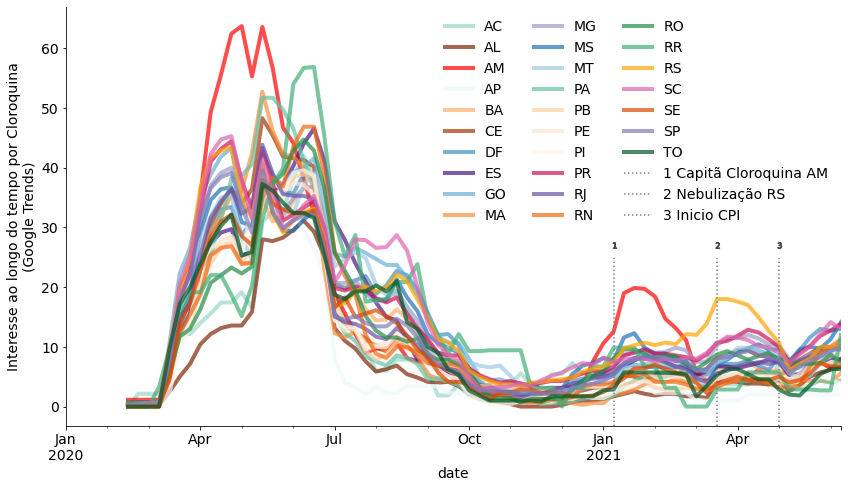

In [153]:
fig, ax = plt.subplots(1,1,figsize=(12,7))


# cloroquina terms
for column in sorted(dfs.columns):
    dfs.loc[:,column].rolling(7).mean().plot(logy=False,ax=ax,lw=4,c=brazil_colormap.get(column),alpha=.7)
# dfs[[c for c in dfs.columns if ("clo" in c) or ("chlo" in c)]].plot(logy=False,ax=axs[1],lw=4)
# dfs.mean(axis=1).rolling(7).mean().plot(logy=False,ax=ax,lw=6,ls="--",c="red",label="Brasil")

ax.axvline(dt(2021,1,4),ymax=.4,c="0.5",label="1 Capitã Cloroquina AM",ls=":")
ax.axvline(dt(2021,3,19),ymax=.4,c="0.5",label="2 Nebulização RS",ls=":")
ax.axvline(dt(2021,4,27),ymax=.4,c="0.5",label="3 Inicio CPI",ls=":")

ax.scatter(
    dt(2021,1,4), 27, c="0.3",
    marker=r"${}$".format(1)#,markersize=12
)

ax.scatter(
    dt(2021,3,19), 27, c="0.3",
    marker=r"${}$".format(2)#,markersize=12
)

ax.scatter(
    dt(2021,4,27), 27, c="0.3",
    marker=r"${}$".format(3)#,markersize=12
)
# plot_marker(dfs, dt(2021,1,4), marker="1", label="Capitã Cloroquina AM", color="0.3")
# plot_marker(all_tweets_df, dt(2018,9,6), marker="1", label="Bolsonaro Stabbed", color="0.3")

# for ax in axs:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax2 = ax.twinx()
# ddays_summary.bot_score.plot(ax=ax2,color="r")
ax.set_ylabel("Interesse ao longo do tempo por Cloroquina\n(Google Trends)",fontsize=14)
# ax2.set_ylabel("Msg bot score")
leg = ax.legend(
#     loc=[1.01,.0],
    frameon=False,
    ncol=3,
    fontsize=14
)
# for l in leg.get_texts():
#     l.set_text(l.get_text().replace("_"," ").replace("-",": "))
plt.tight_layout()        
plt.savefig("cloroquina_brasil.png", dpi=350,facecolor="white")

In [150]:
dfs.tail()

,TO,SE,SC,SP,RS,RR,RO,RN,RJ,PR,...,DF,BA,AM,AC,MS,ES,AP,MA,CE,AL
date,,,,,,,,,,,,,,,,,,,,,
2021-05-16,6.0,11.0,21.0,14.0,15.0,0.0,4.0,10.0,17.0,17.0,...,20.0,17.0,16.0,0.0,24.0,9.0,0.0,8.0,17.0,10.0
2021-05-23,12.0,12.0,14.0,14.0,12.0,0.0,5.0,27.0,11.0,18.0,...,18.0,16.0,13.0,13.0,14.0,14.0,0.0,0.0,15.0,10.0
2021-05-30,13.0,12.0,20.0,11.0,18.0,19.0,5.0,18.0,12.0,22.0,...,17.0,9.0,3.0,0.0,3.0,8.0,7.0,9.0,12.0,5.0
2021-06-06,6.0,0.0,18.0,9.0,8.0,0.0,19.0,7.0,9.0,12.0,...,3.0,8.0,3.0,13.0,19.0,11.0,0.0,2.0,5.0,3.0
2021-06-13,0.0,0.0,0.0,7.0,5.0,65.0,0.0,9.0,6.0,14.0,...,5.0,4.0,11.0,0.0,20.0,5.0,0.0,12.0,4.0,6.0
